# Project Overview

The project's title is "Detection and Classification of Spam Comments on Youtube". The purpose of this project is to detect and classify types of spam comments that appear on Youtube videos. In essence, this means taking comments from Youtube videos, taking the data associated with the comment, e.g. the author's name, and trying to find correlations between the comment and its data with spam comments. I will use models such as logistic regression, decision trees, and support vector machines to fully cross-check the results of the classification

# Importing the CSV file with 1000+ comments with classification of spam and non spam (1 and 0)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('CS418_DS.csv')

display(df)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
1133,z13lvr4iupatjlrem231yvpxolzvspwdl,Salty Croc,2014-07-22T04:20:37.489000,Like this comment for no reason﻿,1
1134,z12lxhrqdkyusbkji04cihtrvn3jvxnqszg0k,Bob Orton,2014-07-22T00:26:50.820000,love this song﻿,0
1135,z12xhdjrsxm3v550w22oynsjrnmvjhkvj,LuckyMusiqLive,2014-07-21T22:25:54.048000,this song is awesome. these guys are the best....,1
1136,z13msngo3qvwx1ym223pehqgouexzdmnm,xXxPWND 420xXx,2014-07-21T11:05:51.945000,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


# Cleaning Data

We will delete the Comment_ID column because we don't really need it for classification and it won't be relevant for anything later on as well. Note that all the rows are necessary, because any comment, even an empty one, can be classified as spam or non-spam:

In [2]:
df = df.drop(['COMMENT_ID'], axis=1)
display(df)

,AUTHOR,DATE,CONTENT,CLASS
0,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...
1133,Salty Croc,2014-07-22T04:20:37.489000,Like this comment for no reason﻿,1
1134,Bob Orton,2014-07-22T00:26:50.820000,love this song﻿,0
1135,LuckyMusiqLive,2014-07-21T22:25:54.048000,this song is awesome. these guys are the best....,1
1136,xXxPWND 420xXx,2014-07-21T11:05:51.945000,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


# Exploratory Data Analysis & Visualizations

The data itself looks interesting in terms of common patterns among the comments. Many of the spam comments either have links asssociated with them, emotes/emojis, or unrelated text to the content of the video. There is a pretty even split of spam to non-spam comments. The video dates all range around the same time, and the authors are all also practically unique. Sometimes, something that classifies a comment as spam are multiple comments in a short time by the same author, but that's not that case here. We believe that we will be able to properly classify any comments as spam or not using this initial data.

# Visualizations (EDA)

One interesting question we can pose in which keyword seems to have a greater impact than others in terms of scam comments. For this, we can pick any n arbitrary "scammy" words and put them against eachother. Obviously, these aren't guaranteed to be the most common scam words, but we can still see how they face against eachother. Here, we pick 4 common words ("http" for a link, "check" for a referral scam, "follow" for a follow bot, and "like" for a like bot) and see which usually appeared more in the data set. We have to remember to also make sure not to count duplicated (sentences with more than one), so we can also prioritize (obviously this will create some bias).


432


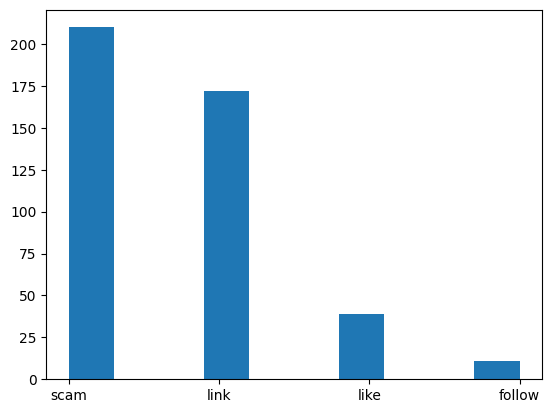

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

d = df[df['CLASS'] == 1]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['CONTENT'])
temp = pd.DataFrame(vectorizer.get_feature_names_out(), columns=['Vals'])

counts = []
for (columnName, columnData) in d['CONTENT'].iteritems():
    if "http" in columnData.lower():
        counts.append("link")
    elif "check" in columnData.lower():
        counts.append("scam")
    elif "follow" in columnData.lower():
        counts.append("follow")
    elif "like" in columnData.lower():
        counts.append("like")
plt.hist(counts)
print(len(counts))

Notice how a scam referral using the word "check" had the most unique messages, and these aren't even counting overlapping ones. Here are the overlapping ones:

493


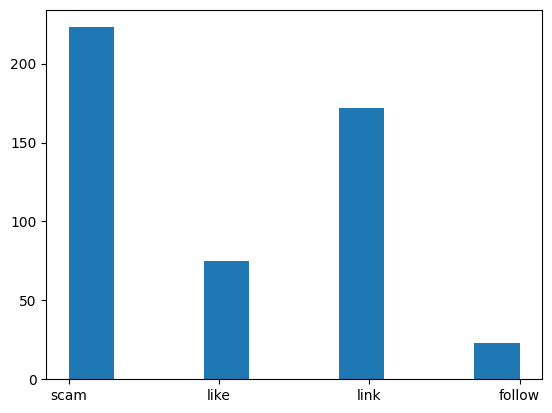

In [4]:
counts2 = []
for (columnName, columnData) in d['CONTENT'].iteritems():
    if "http" in columnData.lower():
        counts2.append("link")
    if "check" in columnData.lower():
        counts2.append("scam")
    if "follow" in columnData.lower():
        counts2.append("follow")
    if "like" in columnData.lower():
        counts2.append("like")
plt.hist(counts2)
print(len(counts2))

Notice how the graphs are almost identical, with "scam" being the first and "link" the second. The only difference seems to be an increase in the "like" category. Through this, we can also conclude that most of the scams are pretty unique, or rather use unique words. There doesn't seem to be a lot of overlap. ALSO note how using just these 4 words, we've hit almost 500 sentences, which is close to the scam total amount! This means that most of the scam messages contain these 4 words that we chose at random.

Mean length of non-spam comments: 59.1231884057971
Mean length of spam comments: 105.7815699658703


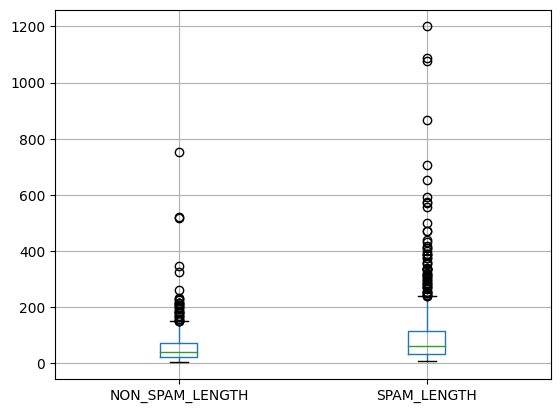

In [5]:
# Are spam comments longer than non-spam comments on average?

# Extracting the comments that are classifed as spam or not
# into their own respective Series objects
non_spam_comments_df = df.query('CLASS == 0')['CONTENT']
spam_comments_df = df.query('CLASS == 1')['CONTENT']

# Replacing the contents of each Series with the lengths
# of each individual comment
non_spam_lengths = non_spam_comments_df.apply(len)
spam_lengths = spam_comments_df.apply(len)

# Converting both Series to actual Dataframes
# This is to use the boxplot command
non_spam_lengths = non_spam_lengths.to_frame()
spam_lengths = spam_lengths.to_frame()

# Combine both dataframes into one dataframe
# This is to plot both boxplots on one plot
combined_dfs = pd.DataFrame({'NON_SPAM_LENGTH': non_spam_lengths['CONTENT'],
                             'SPAM_LENGTH': spam_lengths['CONTENT']})

# Boxplot of the lengths of non spam comments and spam comments
combined_dfs.boxplot()

print("Mean length of non-spam comments:", np.mean(combined_dfs['NON_SPAM_LENGTH']))
print("Mean length of spam comments:", np.mean(combined_dfs['SPAM_LENGTH']))

This is a visualization comparing the length in characters of the non-spam data to the spam data.

The final visualization will involve looking at the relationship between emoji count and comment length (in characters). We can use the emoji package to help us count the amount of emojis in a string:

In [6]:
import emoji

arr = []
arr2 = []

for str in df['CONTENT']:
    d = emoji.emoji_list(str)
    arr.append(len(d))
    arr2.append(len(str))
    
df.insert(3, "Emoji Count", arr, True)
display(df)

,AUTHOR,DATE,CONTENT,Emoji Count,CLASS
0,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",0,1
1,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,0,1
2,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,0,1
3,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,0,1
4,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,0,1
...,...,...,...,...,...
1133,Salty Croc,2014-07-22T04:20:37.489000,Like this comment for no reason﻿,0,1
1134,Bob Orton,2014-07-22T00:26:50.820000,love this song﻿,0,0
1135,LuckyMusiqLive,2014-07-21T22:25:54.048000,this song is awesome. these guys are the best....,0,1
1136,xXxPWND 420xXx,2014-07-21T11:05:51.945000,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,0,1


Here, we count the amount of emojis and add it to an array which will equal the number of rows in our dataset. We also keep track on the length of each string here. Then, we will use the basic line plot to see the relationship between the 2 variables. First, we will plot it against the whole dataset. We can change the color of the data points based on if they have at least 1 emoji vs none:

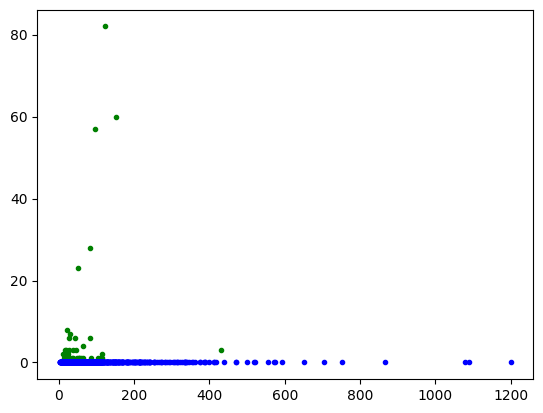

Number of comments without emojis 1103
Number of comments with emojis 35


In [7]:
import matplotlib.pyplot as plt

arr = np.array(arr)

supper = np.ma.masked_where(arr > 0, arr)
slower = np.ma.masked_where(arr == 0, arr)

fig, ax = plt.subplots()
ax.plot(arr2, slower, 'go', arr2, supper, 'bo', markersize = 3)
plt.show()

a = arr[arr == 0]
b = arr[arr > 0]
print("Number of comments without emojis", len(a))
print("Number of comments with emojis", len(b))

As shown, most of the comments dont contain emojis. We can now test to see how much of the spam comments and non-spam comments contain emojis using the same method:

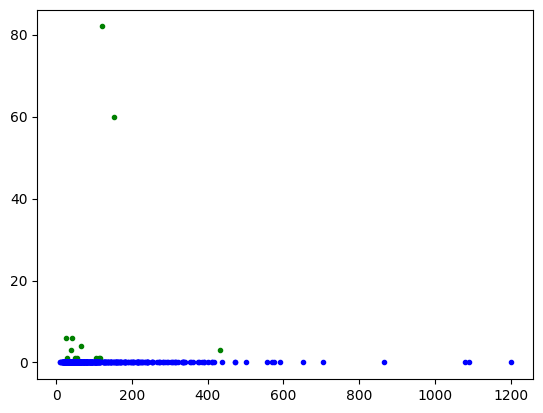

Number of comments without emojis 573
Number of comments with emojis 13


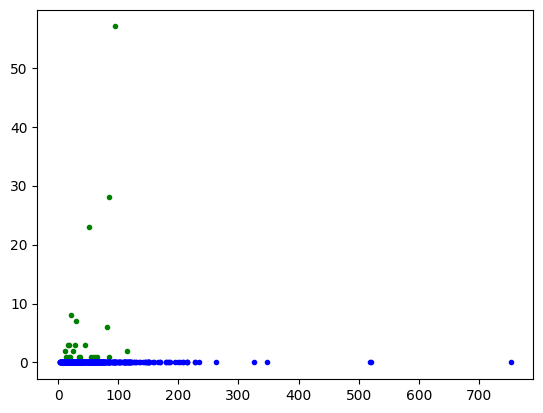

Number of comments without emojis 530
Number of comments with emojis 22


In [8]:
d1 = df[df['CLASS'] == 1]
d0 = df[df['CLASS'] == 0]

arr3 = []
arr4 = []
arr5 = []
arr6 = []

for str in d1['CONTENT']:
    d = emoji.emoji_list(str)
    arr3.append(len(d))
    arr4.append(len(str))
    
for str in d0['CONTENT']:
    d = emoji.emoji_list(str)
    arr5.append(len(d))
    arr6.append(len(str))
    
    
arr3 = np.array(arr3)
arr5 = np.array(arr5)

supper = np.ma.masked_where(arr3 > 0, arr3)
slower = np.ma.masked_where(arr3 == 0, arr3)

fig, ax = plt.subplots()
ax.plot(arr4, slower, 'go', arr4, supper, 'bo', markersize = 3)
plt.show()

a = arr3[arr3 == 0]
b = arr3[arr3 > 0]
print("Number of comments without emojis", len(a))
print("Number of comments with emojis", len(b))


supper = np.ma.masked_where(arr5 > 0, arr5)
slower = np.ma.masked_where(arr5 == 0, arr5)

fig, ax = plt.subplots()
ax.plot(arr6, slower, 'go', arr6, supper, 'bo', markersize = 3)
plt.show()

a = arr5[arr5 == 0]
b = arr5[arr5 > 0]
print("Number of comments without emojis", len(a))
print("Number of comments with emojis", len(b))


Here we see that actually the non-spam comments contain more emojis than the spam ones. Obviously both contain a very small amount, but it is interesting to see that the non-spam comments contain almost double the amount than the spam comments.

# Classification using Machine Learning

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import mean_squared_error, r2_score

# Importing dataset
df = pd.read_csv('CS418_DS.csv')

# Cleaning data
df = df.drop(['COMMENT_ID'], axis=1)

# In our current dataset, "CONTENT" is a string.
# We need to change this strings (non-numeric) values into numbers,
# we use Count Vectorization to convert the comment strings into number
# so we can use Bernoulli Naive Bayes algorithm to classify commments.
cv_model = CountVectorizer()
cv_model.fit(df['CONTENT'], df['CLASS'])
x = cv_model.transform(df['CONTENT'])

# Split the data into train and split subsets
# The target in this case is the "CLASS" column where 0 is not a spam comment
# and 1 represents that comment (row) is a spam comment
# The random_state is just a random number to see the splitting of the data to reproduce results.
train_x, test_x, train_y, test_y = train_test_split(x, df['CLASS'], test_size=0.20, random_state=57)

# Fitting the Bernouilli Naive Bayes model with the split data
# We picked BNB because it is great for predicting binary classes
# This works for us because a comment can either be spam or not (binary column)
Bnb_model = BernoulliNB()
Bnb_model.fit(train_x, train_y)

# Get predictions for spam comments using test data
Bnb_pred = Bnb_model.predict(test_x)

# Get predictions for spam comments using train data
Bnb_pred_training = Bnb_model.predict(train_x)

# Print the r-squared value
print('R-squared: %.2f' % r2_score(test_y, Bnb_pred))

# Print the mean squared error for training
print('Mean squared error for training: %.2f'% mean_squared_error(train_y, Bnb_pred_training))

# Print the mean squared error for testing
print('Mean squared error for testing: %.2f'% mean_squared_error(test_y, Bnb_pred))

R-squared: 0.75
Mean squared error for training: 0.04
Mean squared error for testing: 0.06


# Support Vector Machines

In [10]:
from sklearn import svm
from scipy.sparse import hstack

# The dataset has already been imported, cleaned, and fit using Count Vectorization
# This data is still held in the x variable from the previous ML Analysis
# The data stored in x is just the CONTENT column


# We are using SVM (Support Vector Machine) for our second ML Analysis
# This algorithm is also great for us because comments can either be spam or not
# SVM in our case will try to create a line that seperates comments into spam or not
# just based off the comment itself.

# We will be using the same split data from ML Analysis 1 because we want to look at how
# well the comments themselves are classified into spam
svm_model = svm.SVC()
svm_model.fit(train_x, train_y)

# Get predictions for spam comments using test data
svm_pred = svm_model.predict(test_x)

# Get predictions for spam comments using train data
svm_pred_training = svm_model.predict(train_x)

# Print the r-squared value
print('R-squared: %.2f' % r2_score(test_y, svm_pred))

# Print the mean squared error for training
print('Mean squared error for training: %.2f'% mean_squared_error(train_y, svm_pred_training))

# Print the mean squared error for testing
print('Mean squared error for testing: %.2f'% mean_squared_error(test_y, svm_pred))

R-squared: 0.84
Mean squared error for training: 0.02
Mean squared error for testing: 0.04


In [11]:
# Converting comments into numbers
cv_model = CountVectorizer()
cv_model.fit(df['CONTENT'])
x_before = cv_model.transform(df['CONTENT'])

# Converting the authors into numbers
cv_model.fit(df['AUTHOR'])
x2 = cv_model.transform(df['AUTHOR'])

# Combining both count vectorized data into one
# This is to split the data
x = hstack((x_before, x2))

# Split the data
train_x, test_x, train_y, test_y = train_test_split(x, df['CLASS'], test_size=0.20, random_state=57)

# SVM Model
svm_model = svm.SVC()
svm_model.fit(train_x, train_y)

# Get predictions for spam comments using test data
svm_pred = svm_model.predict(test_x)

# Get predictions for spam comments using train data
svm_pred_training = svm_model.predict(train_x)

# Print the r-squared value
print('R-squared: %.2f' % r2_score(test_y, svm_pred))

# Print the mean squared error for training
print('Mean squared error for training: %.2f'% mean_squared_error(train_y, svm_pred_training))

# Print the mean squared error for testing
print('Mean squared error for testing: %.2f'% mean_squared_error(test_y, svm_pred))

R-squared: 0.84
Mean squared error for training: 0.01
Mean squared error for testing: 0.04


# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

# Logistic Regresssion model creation and fitting
LR_model = LogisticRegression(random_state=57)
LR_model.fit(train_x, train_y)

# Get predictions for spam comments using test data
LR_pred = LR_model.predict(test_x)

# Get predictions for spam comments using train data
LR_pred_training = LR_model.predict(train_x)

# Print the r-squared value
print('R-squared: %.2f' % r2_score(test_y, LR_pred))

# Print the mean squared error for training
print('Mean squared error for training: %.2f'% mean_squared_error(train_y, LR_pred_training))

# Print the mean squared error for testing
print('Mean squared error for testing: %.2f'% mean_squared_error(test_y, LR_pred))

R-squared: 0.86
Mean squared error for training: 0.00
Mean squared error for testing: 0.04


# Results

We will briefly talk about our results for everything we did here. You can look underneath the code ff each ML analysis and visualization for additional information about the respective item.

#### Visualization 1
Visualization 1 looked at 4 fours words found in spam comments that were from our dataset. We found that the word "check" appeared most followed by a close second of "https". We then made the conclusion that scam comments more than often has the word "check" or a link to click on.

#### Visualization 2
For Visualization 2, we found that spam comments tend to be longer compared to non-spam comments. We found this correlation using a box plot and looking at the averages of the lengths of spam vs. non-spam comments.

#### Visualization 3
For Visualization 3, we looked at emojis found in comments and if they have any sort of relationship with spam comments. We found that non-spamm comments tend to have more emojis than spam comments. Even though both spam and non-spam comments contain small numbers of emojis, we still found that non-spam comments contained almost double the amount of spam comments.

#### ML Analyses
For all of our ML analyses, we first used Count Vectorization to convert comments and the respective authors of each comment into numbers in order to use our subsequent ML algorithms. Then, we used Bernouilli Naive Bayes, Support Vector Machine, and Logistic Regression to look at the relationships between spam comments and the contents of the spam comments themselves. We also used the authors of comments as a feature for some of our analyses. From all of our analyses, we found that Logistic Regression is the best ML algorithm out of the three we tested for classifying spam comments.

# References

- Sklearn
- UCI Dataset
- Export Comments
- towardsdatascience.com
- Google for basic commands and resources